In [2]:
pip install scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


In [4]:

# Define the universe of discourse for each variable
temperature_range = np.linspace(-40, 40, 1000)  # Temperature: -40 to 40 degrees
humidity_range = np.linspace(10, 100, 1000)     # Humidity: 10% to 100%
speed_range = np.linspace(0, 20, 1000)          # Speed: 0 to 20 (motor speed)


In [5]:

# Fuzzification of Temperature (T)
T_L = fuzz.trimf(temperature_range, [-40, -20, 0])  # Low temperature
T_M = fuzz.trimf(temperature_range, [0, 20, 40])    # Moderate temperature
T_H = fuzz.trimf(temperature_range, [20, 30, 40])   # High temperature


In [6]:

# Fuzzification of Humidity (H)
H_L = fuzz.trimf(humidity_range, [10, 20, 40])   # Low humidity
H_M = fuzz.trimf(humidity_range, [40, 55, 70])   # Moderate humidity
H_H = fuzz.trimf(humidity_range, [70, 85, 100])  # High humidity


In [7]:

# Fuzzification of Motor Speed (V)
V_L = fuzz.trimf(speed_range, [0, 5, 10])   # Low speed
V_M = fuzz.trimf(speed_range, [5, 10, 15])  # Moderate speed
V_H = fuzz.trimf(speed_range, [10, 15, 20]) # High speed


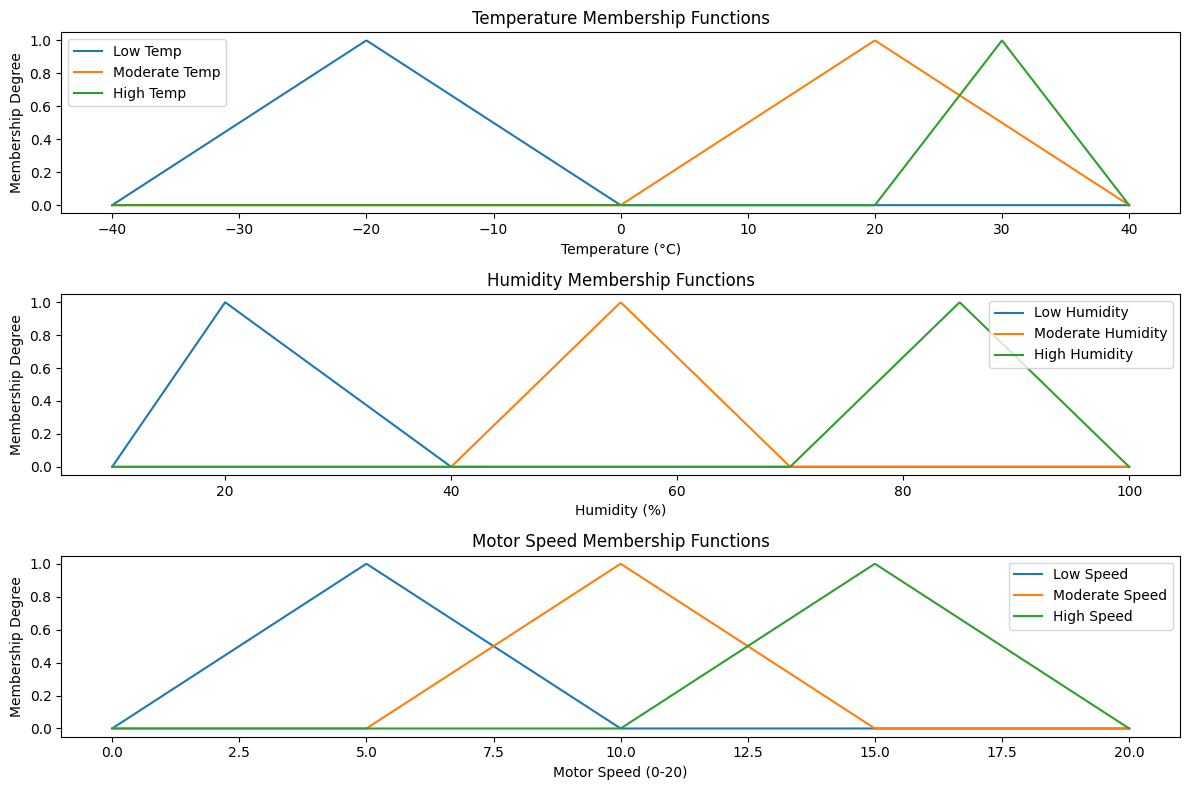

In [8]:

# Visualize the fuzzy membership functions for each variable
def plot_memberships():
    plt.figure(figsize=(12, 8))

    # Plot Temperature membership functions
    plt.subplot(3, 1, 1)
    plt.plot(temperature_range, T_L, label='Low Temp')
    plt.plot(temperature_range, T_M, label='Moderate Temp')
    plt.plot(temperature_range, T_H, label='High Temp')
    plt.title('Temperature Membership Functions')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Membership Degree')
    plt.legend()

    # Plot Humidity membership functions
    plt.subplot(3, 1, 2)
    plt.plot(humidity_range, H_L, label='Low Humidity')
    plt.plot(humidity_range, H_M, label='Moderate Humidity')
    plt.plot(humidity_range, H_H, label='High Humidity')
    plt.title('Humidity Membership Functions')
    plt.xlabel('Humidity (%)')
    plt.ylabel('Membership Degree')
    plt.legend()

    # Plot Speed membership functions
    plt.subplot(3, 1, 3)
    plt.plot(speed_range, V_L, label='Low Speed')
    plt.plot(speed_range, V_M, label='Moderate Speed')
    plt.plot(speed_range, V_H, label='High Speed')
    plt.title('Motor Speed Membership Functions')
    plt.xlabel('Motor Speed (0-20)')
    plt.ylabel('Membership Degree')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_memberships()


In [9]:

# Function for fuzzy inference
def fuzzy_inference(temp, hum):
    # Fuzzify the inputs
    T_L_level = fuzz.interp_membership(temperature_range, T_L, temp)
    T_M_level = fuzz.interp_membership(temperature_range, T_M, temp)
    T_H_level = fuzz.interp_membership(temperature_range, T_H, temp)

    H_L_level = fuzz.interp_membership(humidity_range, H_L, hum)
    H_M_level = fuzz.interp_membership(humidity_range, H_M, hum)
    H_H_level = fuzz.interp_membership(humidity_range, H_H, hum)

    # Apply fuzzy rules
    rule1 = min(T_H_level, H_L_level)   # High Temp and Low Humidity → Low Speed
    rule2 = min(T_M_level, H_L_level)   # Moderate Temp and Low Humidity → Low Speed
    rule3 = min(T_L_level, H_L_level)   # Low Temp and Low Humidity → High Speed
    rule4 = H_M_level                    # Moderate Humidity → High Speed
    rule5 = min(T_L_level, H_H_level)   # Low Temp and High Humidity → High Speed

    # Aggregate outputs using fuzzy OR
    aggregated_Low = max(rule1, rule2)
    aggregated_High = max(rule3, rule4, rule5)

    # Defuzzify the output (motor speed)
    V_L_output = fuzz.defuzz(speed_range, V_L, 'centroid') * aggregated_Low
    V_H_output = fuzz.defuzz(speed_range, V_H, 'centroid') * aggregated_High

    # Combine the outputs using fuzzy OR (max rule)
    motor_speed = V_L_output + V_H_output

    return motor_speed


In [10]:

# Test with inputs: Temperature = 20°C, Humidity = 90%
temp_input = 20
hum_input = 90

motor_speed_output = fuzzy_inference(temp_input, hum_input)

print(f'Motor Speed for Temperature = {temp_input}°C and Humidity = {hum_input}%: {motor_speed_output:.2f}')


Motor Speed for Temperature = 20°C and Humidity = 90%: 0.00


In [11]:

# Test with other inputs
inputs = [(10, 50), (-20, 20), (35, 80)]
for temp, hum in inputs:
    motor_speed = fuzzy_inference(temp, hum)
    print(f'Motor Speed for Temperature = {temp}°C and Humidity = {hum}%: {motor_speed:.2f}')


Motor Speed for Temperature = 10°C and Humidity = 50%: 10.00
Motor Speed for Temperature = -20°C and Humidity = 20%: 14.98
Motor Speed for Temperature = 35°C and Humidity = 80%: 0.00
